# Tim - Project Kelompok 6



    Anggota :

    Ahmad Fadillah (PYTN-KS17-06)
    Felic Wicent (PYTN-KS17-025)
    Haniefa Aulia Rahma (PYTN-KS17-01)

    Instructor : Chamdan L Abdulbaaqiy
    Project : Clustering pada Credit Card Dataset for Clustering
    Batch : 5


# A. Perkenalan

## A.1 Latar Belakang

Tambahkan Deskripsi Final Project

## A.2 Dataset

Tambahkan Deskripsi Dataset, dapat darimana, tahun dll

## A.3 Objectif

Tambahkan Objektif apa saja yang ingin dicapai di final project kalian....

Contoh punya gw
Adapun Objektif yang ingin di capai :
1. `Mempersiapkan data yang optimal untuk clustering.`
2. `Mengevaluasi algoritma - algoritma clustering.`

# B. Import Package

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zakan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zakan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zakan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zakan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zakan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import tkinter as tk
import pandas as pd
import string
import re
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from collections import defaultdict
from time import time
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# C. Data Loading

In [3]:
# Membuka File dataset arxiv_data.csv dengan Pandas

df = pd.read_csv('arxiv_data.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG'\]"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG'\]"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI'\]"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG'\]"
...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV']


In [4]:
# Cek jumlah baris dan kolom

row, col = df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

,Jumlah Baris,Jumlah Kolom
0,51774,3


# D. Data Cleaning

In [5]:
# Cek tipe data dan Missing value yang ada

df.info()

# Tidak ada data Null atau None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51774 entries, 0 to 51773
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     51774 non-null  object
 1   summaries  51774 non-null  object
 2   terms      51774 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [6]:
# CeK Jumlah Missing Value pada masing-masing attribute

cek_missing_value = df.isna().sum().reset_index()
cek_missing_value.columns = ['Attribute', 'Jumlah Missing Value']
cek_missing_value

# Tidak ada data Null atau None

,Attribute,Jumlah Missing Value
0,titles,0
1,summaries,0
2,terms,0


In [7]:
# Cek nunique value pada attribute

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

,Kolom,Jumlah
0,titles,38972
1,summaries,38979
2,terms,4022


In [8]:
# Cek jumlah Duplikat yang sama persis

df[df.duplicated(keep=False)]

# Terdapat 18005 data duplikat yang sama persis, dari 51774 baris data

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG'\]"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG'\]"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI'\]"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG'\]"
...,...,...,...
51727,Graph Memory Networks for Molecular Activity P...,Molecular activity prediction is critical in d...,['cs.LG']
51732,Stacked Denoising Autoencoders and Transfer Le...,In this paper we present a system for the dete...,['cs.CV']
51741,ChemGAN challenge for drug discovery: can AI r...,Generating molecules with desired chemical pro...,"['stat.ML', 'cs.AI', 'cs.LG']"
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"


In [9]:
# Menghapus data duplikat yang sama persis

df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)
df

# Berhasil menghapus data duplikat yang menyisakan 42033 Baris data

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG'\]"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG'\]"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI'\]"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG'\]"
...,...,...,...
42028,A Ray-based Approach for Boundary Estimation o...,Diffusion Tensor Imaging (DTI) is a non-invasi...,['cs.CV']
42029,Statistical Denoising for single molecule fluo...,Single molecule fluorescence microscopy is a p...,['cs.CV']
42030,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
42031,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"


# E. Data Exploration

In [10]:
# Cek Descrie dari data

df.describe()

,titles,summaries,terms
count,42033,42033,42033
unique,38972,38979,4022
top,Learnable Hypergraph Laplacian for Hypergraph ...,Transformer is a powerful tool for many natura...,['cs.CV']
freq,3,3,12753


# F. Data Preprocessing

Tahap ini mencakup prapemrosesan data teks pada setiap poin dataset agar lebih mudah dianalisis. Proses-proses yang dilakukan mencakup casefolding, tokenisasi, stop word removal, dan lemmatisasi.

## F.1 Fungsi Case Folding, Tokenization, Stop Word, Lemmatisasi, TF-IDF

In [11]:
def remove_punctuation(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'\s+', ' ', text)
    return text

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def preprocess_text(text, lang='english'):
    text = remove_punctuation(text.lower())
    words = word_tokenize(text)
    stop_words = set(stopwords.words(lang))
    words = [word for word in words if word not in stop_words]
    tagged = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    result = [lemmatizer.lemmatize(word[0], pos=get_wordnet_pos(word[1]) or wordnet.NOUN) for word in tagged]
    result = ' '.join(result) 
    return result

## F.2 Implementasi

### F.2.1 Testing Text

In [12]:
text = "This is an examples of text preprocessing using NLTK. It includes casefolding, tokenization, stopword removal, and stemming."
preprocessed_text = preprocess_text(text, 'english')
print(preprocessed_text)

example text preprocessing use nltk include casefolding tokenization stopword removal stem


### F.3 Implementasi pada Dataset summaries

In [13]:
# Mengambil 500 data pertama saja untuk mempercepat proses

journalDtf = df[:500].copy() 

In [14]:
# Sebelum

journalDtf['summaries'].head().to_frame()

,summaries
0,Stereo matching is one of the widely used tech...
1,The recent advancements in artificial intellig...
2,"In this paper, we proposed a novel mutual cons..."
3,Consistency training has proven to be an advan...
4,"To ensure safety in automated driving, the cor..."


In [15]:
# Sesudah

journalDtf['summaries'] = journalDtf['summaries'].apply(preprocess_text)
journalDtf['summaries'].head().to_frame()

,summaries
0,stereo match one widely use technique infer de...
1,recent advancement artificial intelligence ai ...
2,paper propose novel mutual consistency network...
3,consistency train proven advance semisupervise...
4,ensure safety automate drive correct perceptio...


In [16]:
# Ekstraksi fitur dilakukan dengan menghitung vektor bobot TF-IDF 
# untuk setiap data teks yang sudah terproses.

t0 = time()

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(journalDtf['summaries'])

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.071 s
n_samples: 500, n_features: 6169


# G. Dimensionality Reduction dengan *Latent Semantic Analysis* (LSA) dan K-Means Clustering

Tahap ini dilakukan untuk mengurangi dimensi dari dataset agar dapat mempercepat algoritma clustering.

In [17]:
# Reduksi dimensi dengan LSA

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa.named_steps['truncatedsvd'].explained_variance_ratio_.sum()
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 39.1%


Pencarian K menggunakan *Elbow Method* dengan *Cosine Similarity* 

Tahap ini dilakukan untuk mengetahui nilai K yang dapat digunakan untuk algoritma clustering. Perhitungan dilakukan dengan menghitung nilai distorsi pada setiap nilai k untuk mencari posisi "siku" dalam grafik yang ada. Untuk membantu dalam perhitungan, nilai jarak yang digunakan adalah *cosine distance*, yang merupakan nilai komplemen dari *Cosine Similarity*.


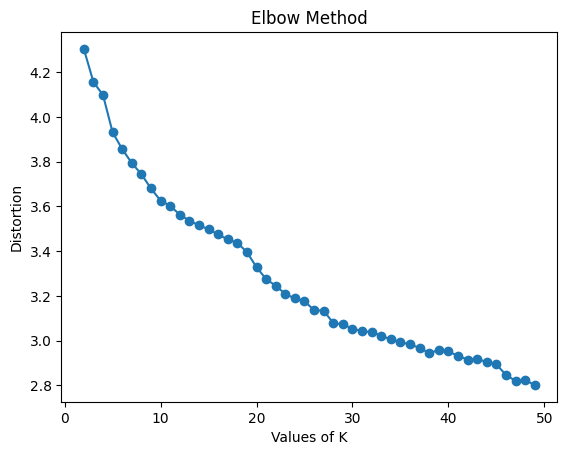

In [18]:
# Jarak antar poin ditetapkan sebagai invers dari nilai cosine similarity
X_cosine_distance = 1 - pairwise_distances(X_lsa, metric='cosine')

inertias = []
K_values = range(2, 50)

for k in K_values:
    kmeans_model = KMeans(n_clusters=k, 
                          n_init=1,
                          random_state=42)
    kmeans_model.fit(X_cosine_distance)
    inertias.append(kmeans_model.inertia_ / X_cosine_distance.shape[0])

plt.plot(K_values, inertias, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

Dengan mempertimbangkan hasil grafik dari antara distorsi dan nilai K. Nilai K yang dapat diambil adalah 2 \<= K \<= 20

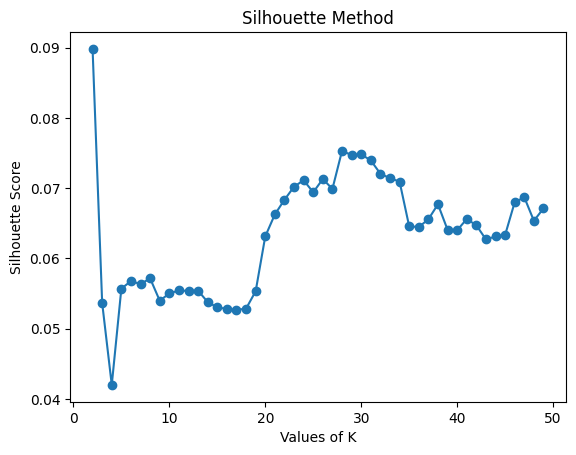

In [19]:
# Jarak antar poin ditetapkan sebagai invers dari nilai cosine similarity
X_cosine_distance = 1 - pairwise_distances(X_lsa, metric='cosine')

silhouette_scores = []
K_values = range(2, 50) 

for k in K_values:
    kmeans_model = KMeans(n_clusters=k, 
                          n_init=1,
                          random_state=42)
    kmeans_labels = kmeans_model.fit_predict(X_cosine_distance)
    silhouette_avg = silhouette_score(X_cosine_distance, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_values, silhouette_scores, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


# H. Evaluation

## H.1 Silhouette Score

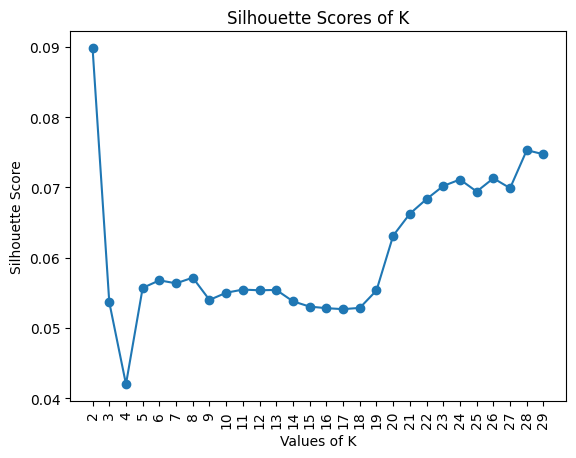

In [20]:
K_values = range(2, 30)
scores = []

for k in K_values:
    kmeans_model = KMeans(n_clusters=k, 
                          n_init=1,
                          random_state=42)
    kmeans_model.fit(X_cosine_distance)
    scores.append(metrics.silhouette_score(X_cosine_distance, kmeans_model.labels_, sample_size=500))

plt.plot(K_values, scores, 'o-')
plt.xticks(K_values, rotation = 90)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores of K')
plt.show()

Dari hasil perhitungan silhouette score berbagai nilai K berbeda didapatkan nilai K terbaik K = 2

# I. Top Terms per clusters

In [21]:
kmeans_model = KMeans(n_clusters=2, n_init=10)
kmeans_model.fit(X_tfidf)

order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(2):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: segmentation label image data learn domain annotation medical method model 
Cluster 1: image segmentation model network method propose feature use object semantic 
